Sathvik Reddy V


BL.EN.U4AIE23127


SPEECH PROCESSING LAB1

In [ ]:
!pip install soundfile
!pip install simpleaudio
!pip install librosa
!pip install scipy

  Using cached simpleaudio-1.0.4.tar.gz (2.0 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for simpleaudio
  Running setup.py clean for simpleaudio
Failed to build simpleaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (simpleaudio)


1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio
import librosa
import librosa.display

In [ ]:
y, sr = sf.read("/content/LJ025-0076.wav")
Audio(y, rate=sr)

2

In [ ]:
num_samples = len(y)
duration = num_samples / sr

print("Sample rate (Hz):", sr)
print("Number of samples:", num_samples)
print("Total duration (sec):", round(duration, 3))

Sample rate (Hz): 22050
Number of samples: 185146
Total duration (sec): 8.397


In [ ]:
frame_length = int(0.025 * sr)
hop_length   = int(0.010 * sr)

energy = []
for i in range(0, len(y) - frame_length, hop_length):
    frame = y[i:i+frame_length]
    energy.append(np.sum(frame**2))

energy = np.array(energy)

threshold = 0.1 * np.max(energy)
active_frames = energy > threshold

active_speech_duration = np.sum(active_frames) * hop_length / sr
print("Active speech duration (sec):", round(active_speech_duration, 3))


Active speech duration (sec): 3.811


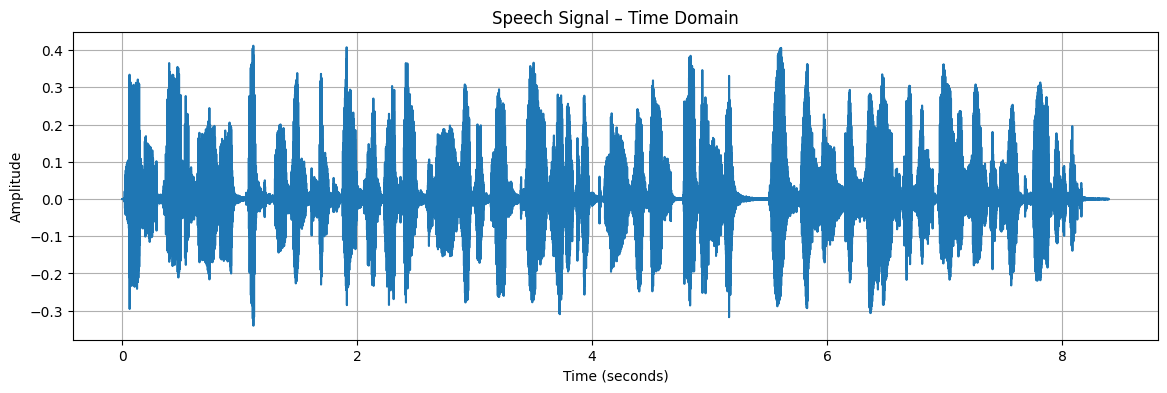

In [ ]:
t = np.linspace(0, duration, len(y))

plt.figure(figsize=(14,4))
plt.plot(t, y)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Signal – Time Domain")
plt.grid()
plt.show()


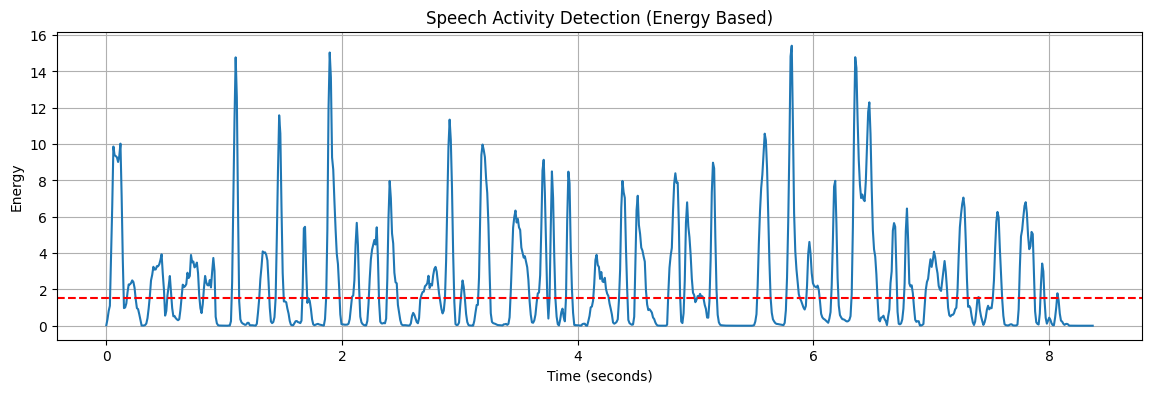

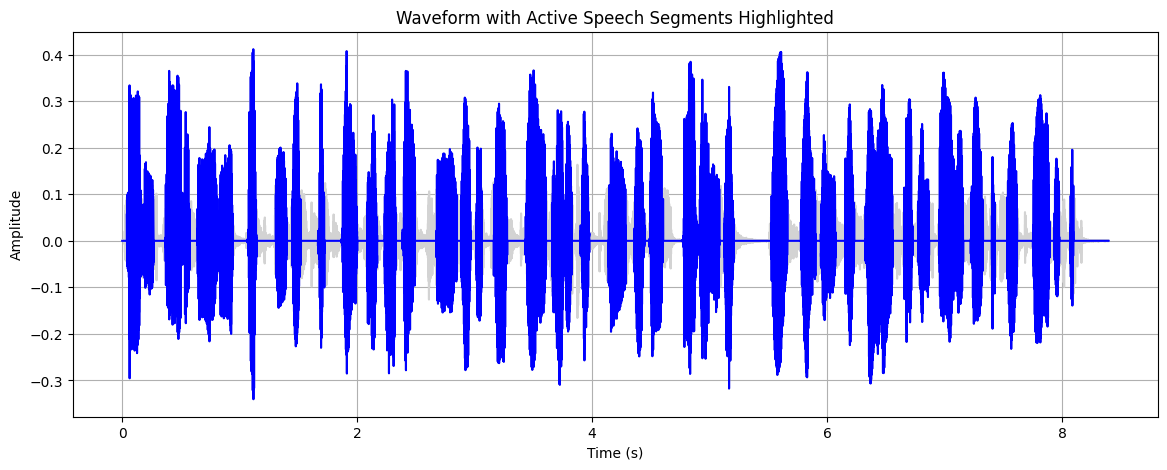

In [ ]:
speech_mask = np.zeros(len(y))

for i, is_active in enumerate(active_frames):
    if is_active:
        start = i * hop_length
        end = start + frame_length
        speech_mask[start:end] = 1

y_active = y * speech_mask

energy_time = np.arange(len(energy)) * hop_length / sr

plt.figure(figsize=(14,4))
plt.plot(energy_time, energy)
plt.axhline(threshold, color='r', linestyle='--')
plt.xlabel("Time (seconds)")
plt.ylabel("Energy")
plt.title("Speech Activity Detection (Energy Based)")
plt.grid()
plt.show()

t = np.linspace(0, len(y)/sr, len(y))

plt.figure(figsize=(14,5))
plt.plot(t, y, color='lightgray')
plt.plot(t, y_active, color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform with Active Speech Segments Highlighted")
plt.grid(True)
plt.show()


3

(i)

In [ ]:
slice_samples = int(2 * sr)
y_slice = y[:slice_samples]

print("Original max amplitude:", np.max(np.abs(y_slice)))

y_norm = y_slice / np.max(np.abs(y_slice))

print("Normalized max amplitude:", np.max(np.abs(y_norm)))

Original max amplitude: 0.411651611328125
Normalized max amplitude: 1.0


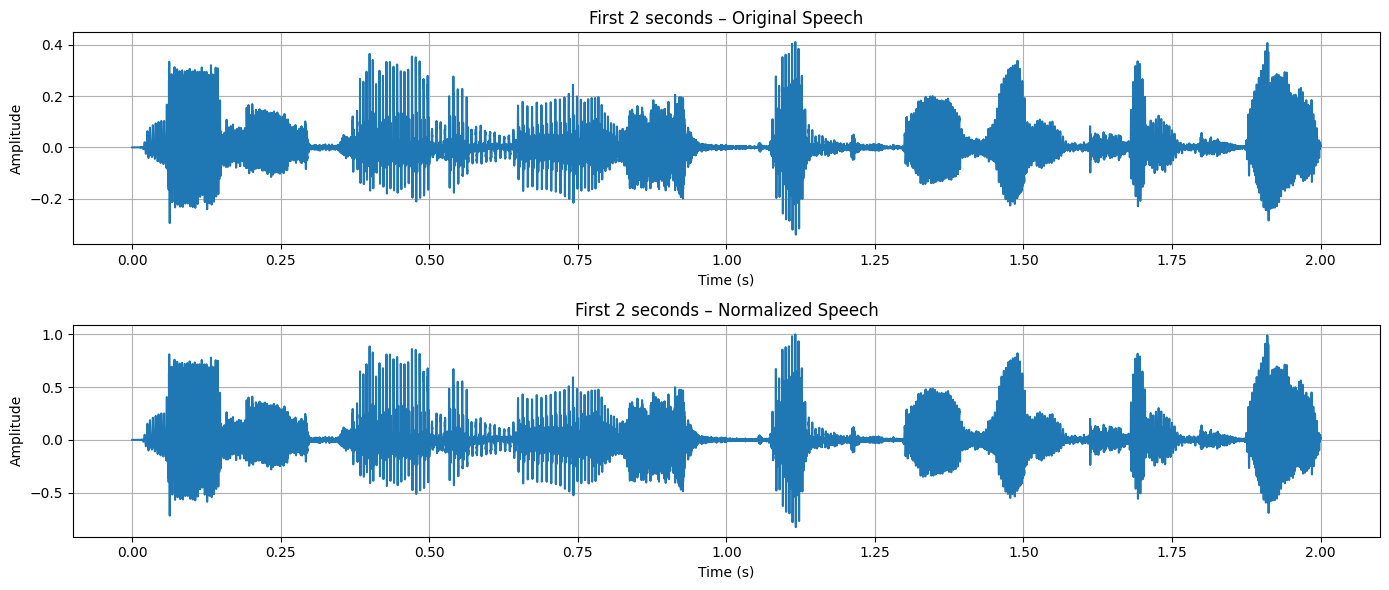

In [ ]:
t = np.linspace(0, len(y_slice)/sr, len(y_slice))

plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
plt.plot(t, y_slice)
plt.title("First 2 seconds – Original Speech")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, y_norm)
plt.title("First 2 seconds – Normalized Speech")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


(ii)

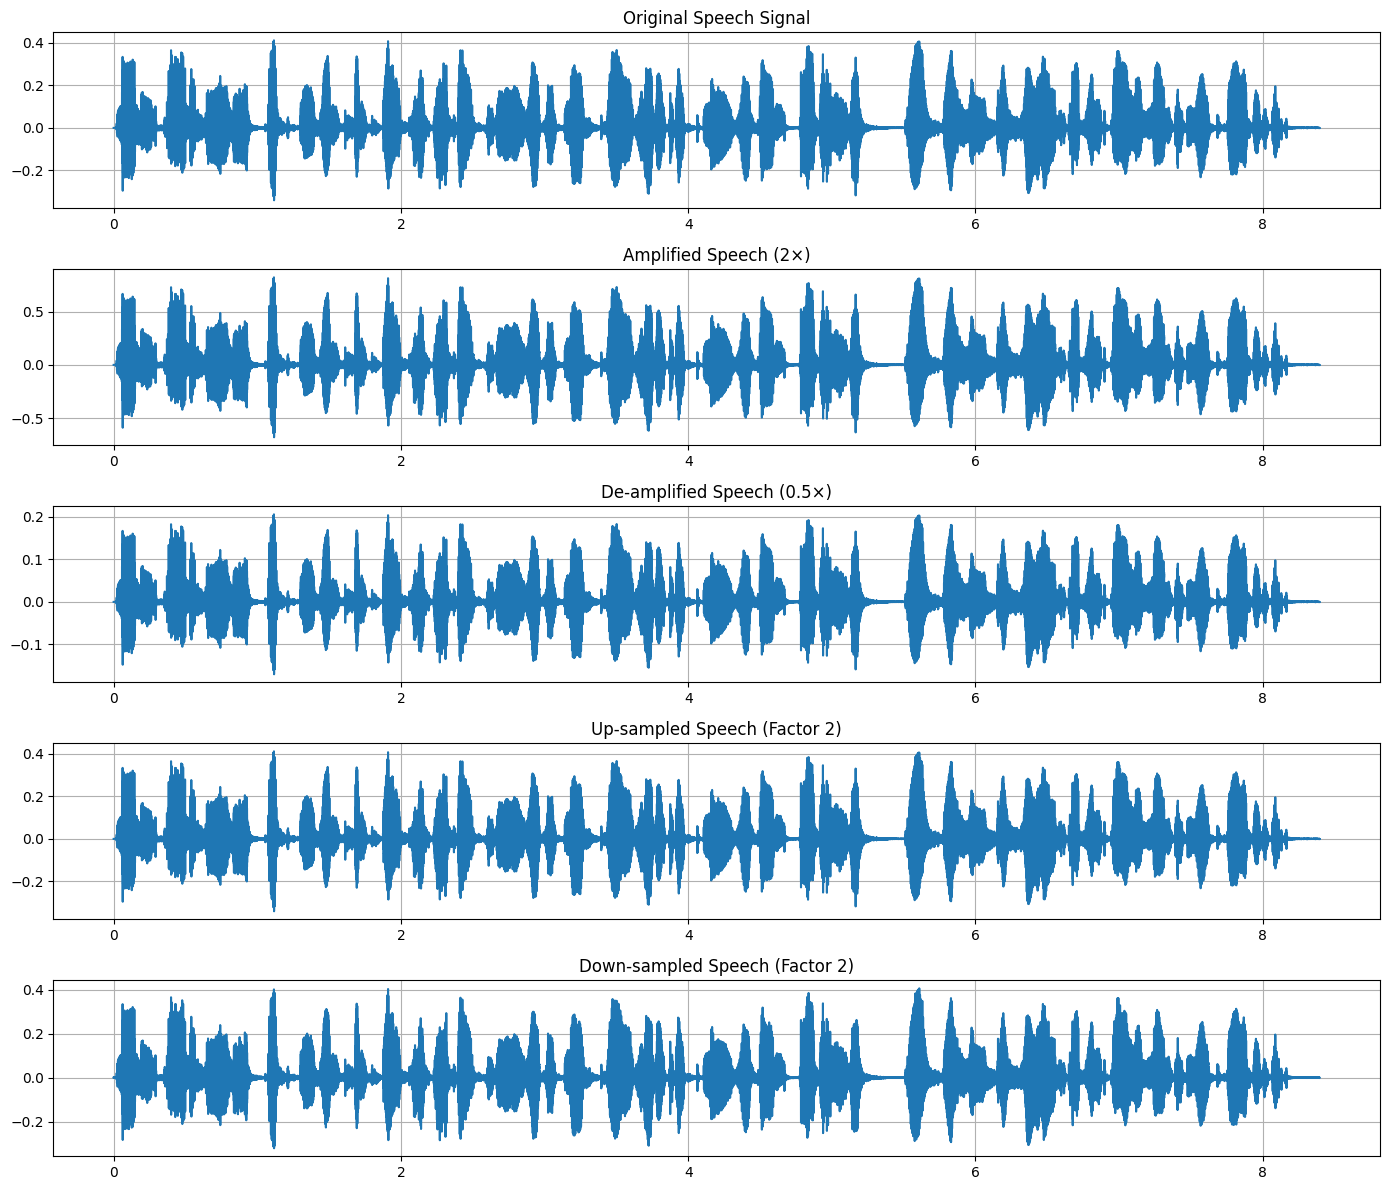

In [ ]:
y_amp = 2 * y

y_deamp = 0.5 * y

y_up = np.repeat(y, 2)
sr_up = sr * 2

y_down = y[::2]
sr_down = sr // 2

t = np.linspace(0, len(y)/sr, len(y))
t_up = np.linspace(0, len(y_up)/sr_up, len(y_up))
t_down = np.linspace(0, len(y_down)/sr_down, len(y_down))

plt.figure(figsize=(14,12))

plt.subplot(5,1,1)
plt.plot(t, y)
plt.title("Original Speech Signal")
plt.grid()

plt.subplot(5,1,2)
plt.plot(t, y_amp)
plt.title("Amplified Speech (2×)")
plt.grid()

plt.subplot(5,1,3)
plt.plot(t, y_deamp)
plt.title("De-amplified Speech (0.5×)")
plt.grid()

plt.subplot(5,1,4)
plt.plot(t_up, y_up)
plt.title("Up-sampled Speech (Factor 2)")
plt.grid()

plt.subplot(5,1,5)
plt.plot(t_down, y_down)
plt.title("Down-sampled Speech (Factor 2)")
plt.grid()

plt.tight_layout()
plt.show()


(iii)

In [ ]:
frame_length = int(0.025 * sr)
hop_length   = int(0.010 * sr)

energy = []
zcr = []

for i in range(0, len(y) - frame_length, hop_length):
    frame = y[i:i+frame_length]

    energy.append(np.sum(frame**2))

    zc = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
    zcr.append(zc)

energy = np.array(energy)
zcr = np.array(zcr)

energy_th = 0.1 * np.max(energy)
zcr_th = np.mean(zcr)

labels = []

for e, z in zip(energy, zcr):
    if e < energy_th:
        labels.append(0)
    elif z > zcr_th:
        labels.append(2)
    else:
        labels.append(1)

labels = np.array(labels)


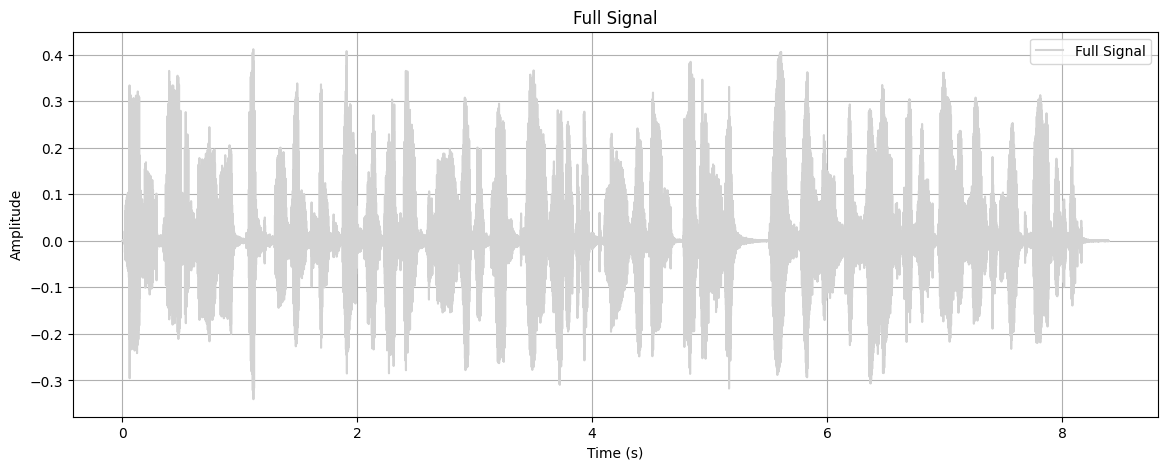

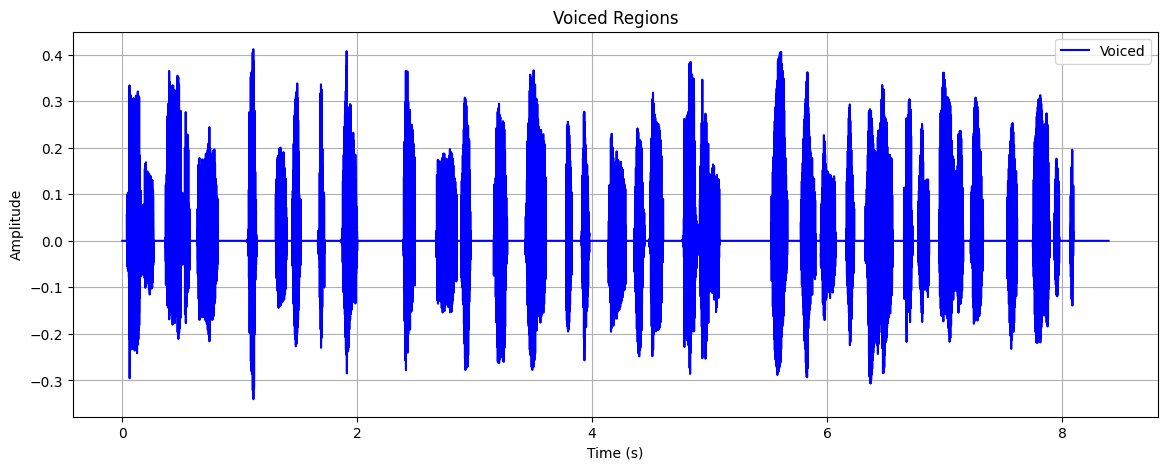

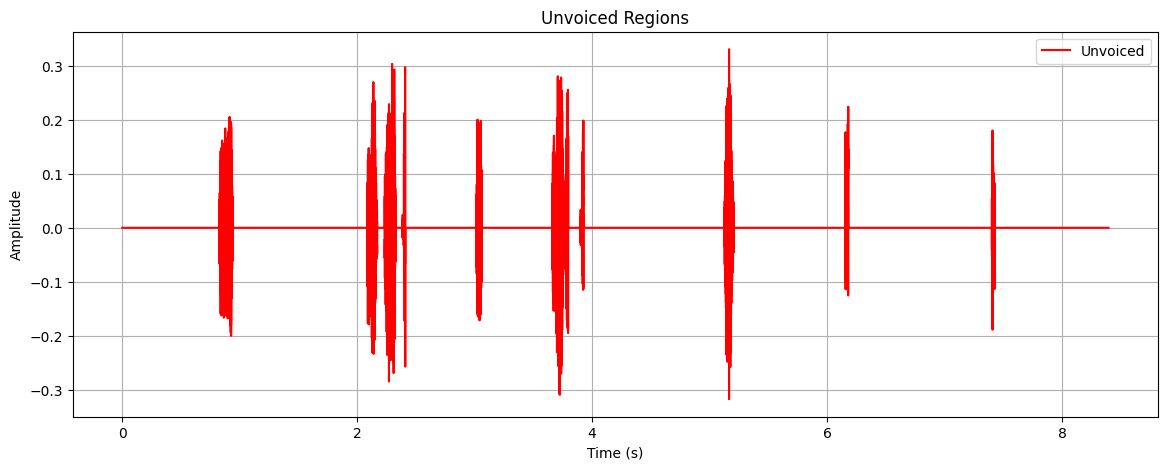

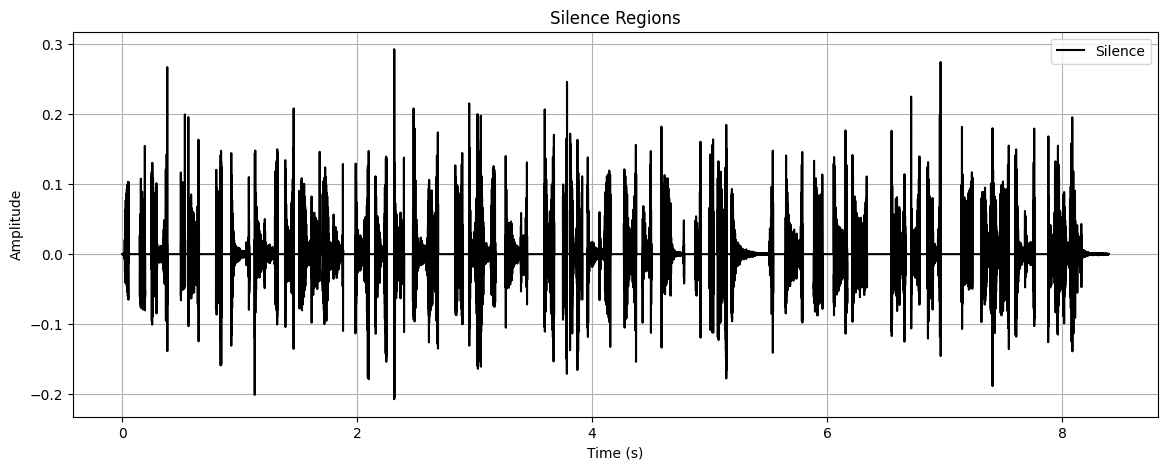

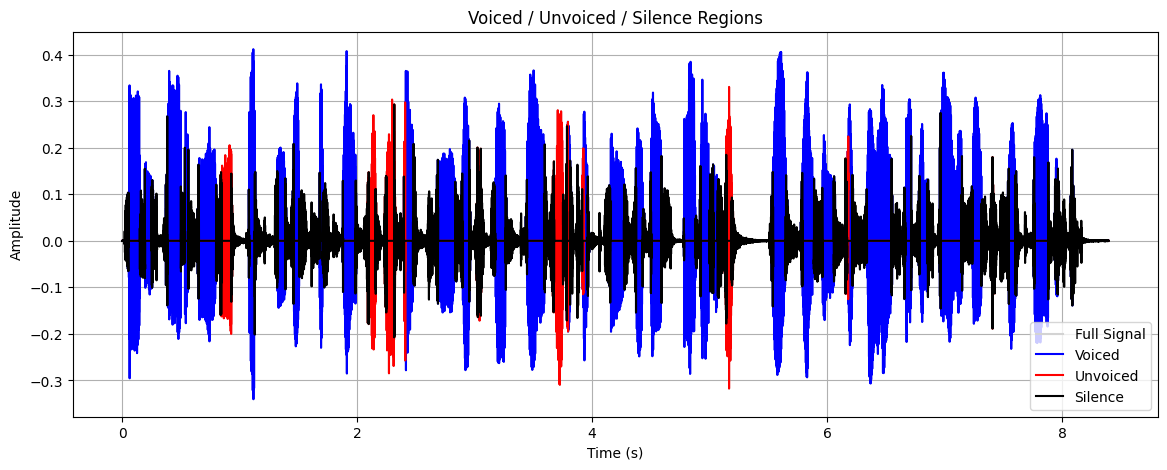

In [ ]:
silence_mask = np.zeros(len(y))
voiced_mask = np.zeros(len(y))
unvoiced_mask = np.zeros(len(y))

for i, lab in enumerate(labels):
    start = i * hop_length
    end = start + frame_length

    if lab == 0:
        silence_mask[start:end] = 1
    elif lab == 1:
        voiced_mask[start:end] = 1
    else:
        unvoiced_mask[start:end] = 1

y_voiced = y * voiced_mask
y_unvoiced = y * unvoiced_mask
y_silence = y * silence_mask

t = np.linspace(0, len(y)/sr, len(y))

plt.figure(figsize=(14,5))
plt.plot(t, y, color='lightgray', label="Full Signal")

plt.title("Full Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(14,5))
plt.plot(t, y_voiced, color='blue', label="Voiced")
plt.title("Voiced Regions")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(14,5))
plt.plot(t, y_unvoiced, color='red', label="Unvoiced")

plt.title("Unvoiced Regions")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(14,5))
plt.plot(t, y_silence, color='black', label="Silence")

plt.title("Silence Regions")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(14,5))
plt.plot(t, y, color='lightgray', label="Full Signal")
plt.plot(t, y_voiced, color='blue', label="Voiced")
plt.plot(t, y_unvoiced, color='red', label="Unvoiced")
plt.plot(t, y_silence, color='black', label="Silence")

plt.title("Voiced / Unvoiced / Silence Regions")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()
